In [35]:
# Gerando um novo CSV ordenado sem dados repetidos e com foco em SP

import pandas as pd
df = pd.read_csv('caso_full.csv')

df_filtered = df[(df['state'] == 'SP') & (df['is_repeated'] == False)].copy()
df_filtered.sort_values(by=['city', 'date'], inplace=True)

# CSV que contem dados de SP capital
df_filtered.to_csv('dados_SP.csv', index=False)

df_filtered_no_sp = df_filtered[df_filtered['city'] != 'São Paulo']

# CSV que não contem dados de SP capital 
df_filtered_no_sp.to_csv('dados_SP_sem.csv', index=False)


In [43]:
df.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


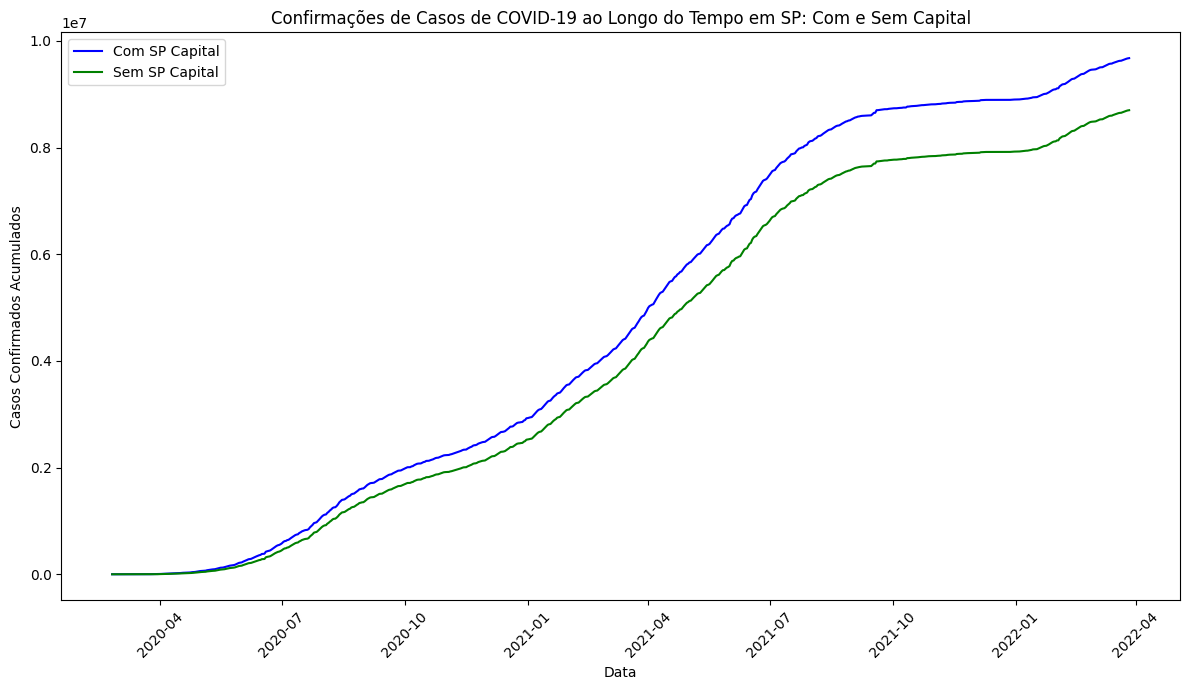

In [37]:
#A similaridade na tendência dos gráficos, mesmo quando a capital é excluída, sugere que houve um padrão comum na progressão da pandemia por todo o estado de São Paulo. 

plt.figure(figsize=(12, 7))
plt.plot(daily_cases['date'], daily_cases['cumulative_confirmed'], label='Com SP Capital', color='blue')
plt.plot(daily_cases_no_sp['date'], daily_cases_no_sp['cumulative_confirmed'], label='Sem SP Capital', color='green')

plt.title('Confirmações de Casos de COVID-19 ao Longo do Tempo em SP: Com e Sem Capital')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados Acumulados')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

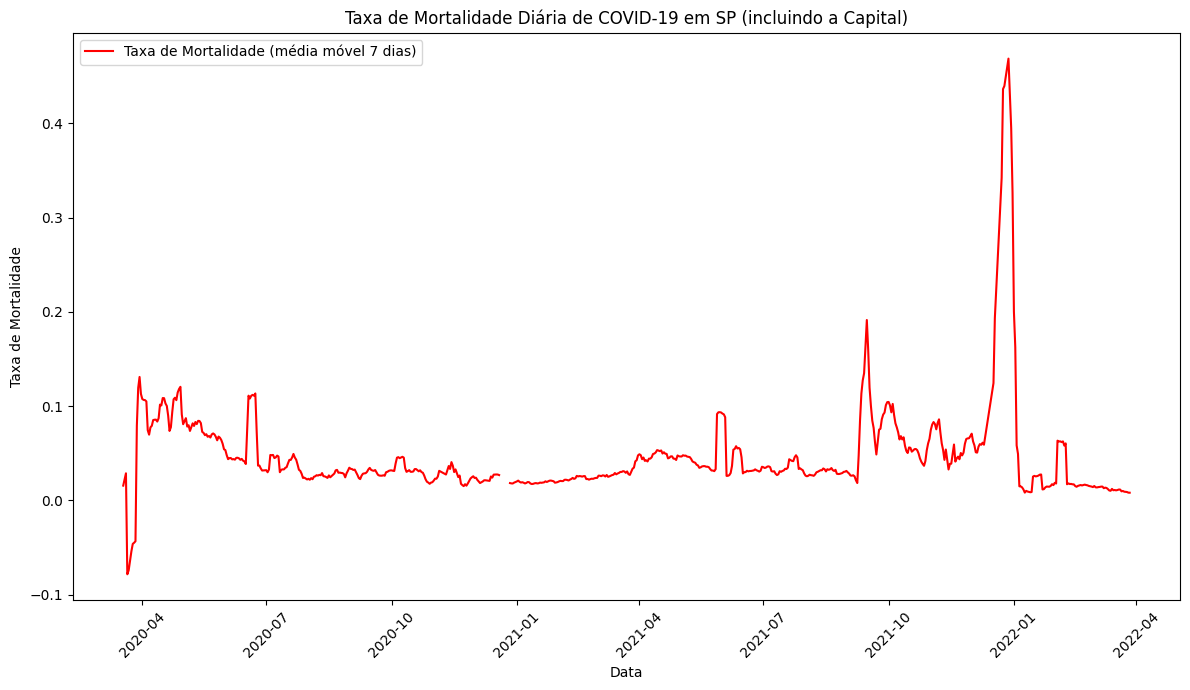

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (assumindo que df_filtered já tenha sido criado e inclua a cidade de São Paulo)
# df_filtered = pd.read_csv('seu_arquivo.csv')

# Converter a coluna 'date' para datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Agrupar os dados por data e calcular a soma diária de novos casos confirmados e novos óbitos
daily_summary = df_filtered.groupby('date').agg({'new_confirmed': 'sum', 'new_deaths': 'sum'}).reset_index()

# Calcular a taxa de mortalidade diária e a média móvel de 7 dias para suavizar a linha do gráfico
daily_summary['death_rate'] = daily_summary['new_deaths'] / daily_summary['new_confirmed']
daily_summary['death_rate_ma7'] = daily_summary['death_rate'].rolling(window=7).mean()

# Criar o gráfico da taxa de mortalidade
plt.figure(figsize=(12, 7))
plt.plot(daily_summary['date'], daily_summary['death_rate_ma7'], label='Taxa de Mortalidade (média móvel 7 dias)', color='red')

plt.title('Taxa de Mortalidade Diária de COVID-19 em SP (incluindo a Capital)')
plt.xlabel('Data')
plt.ylabel('Taxa de Mortalidade')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


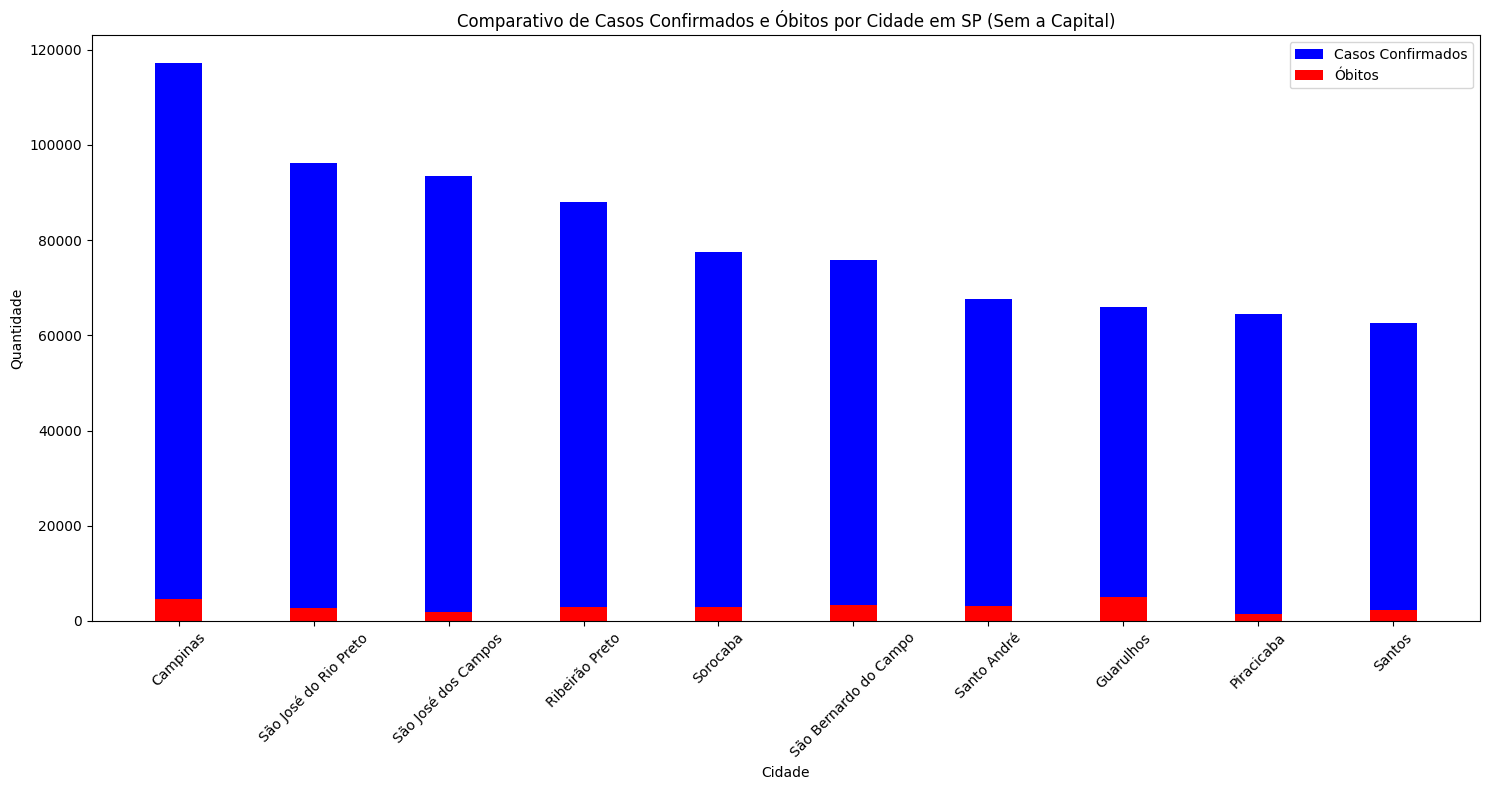

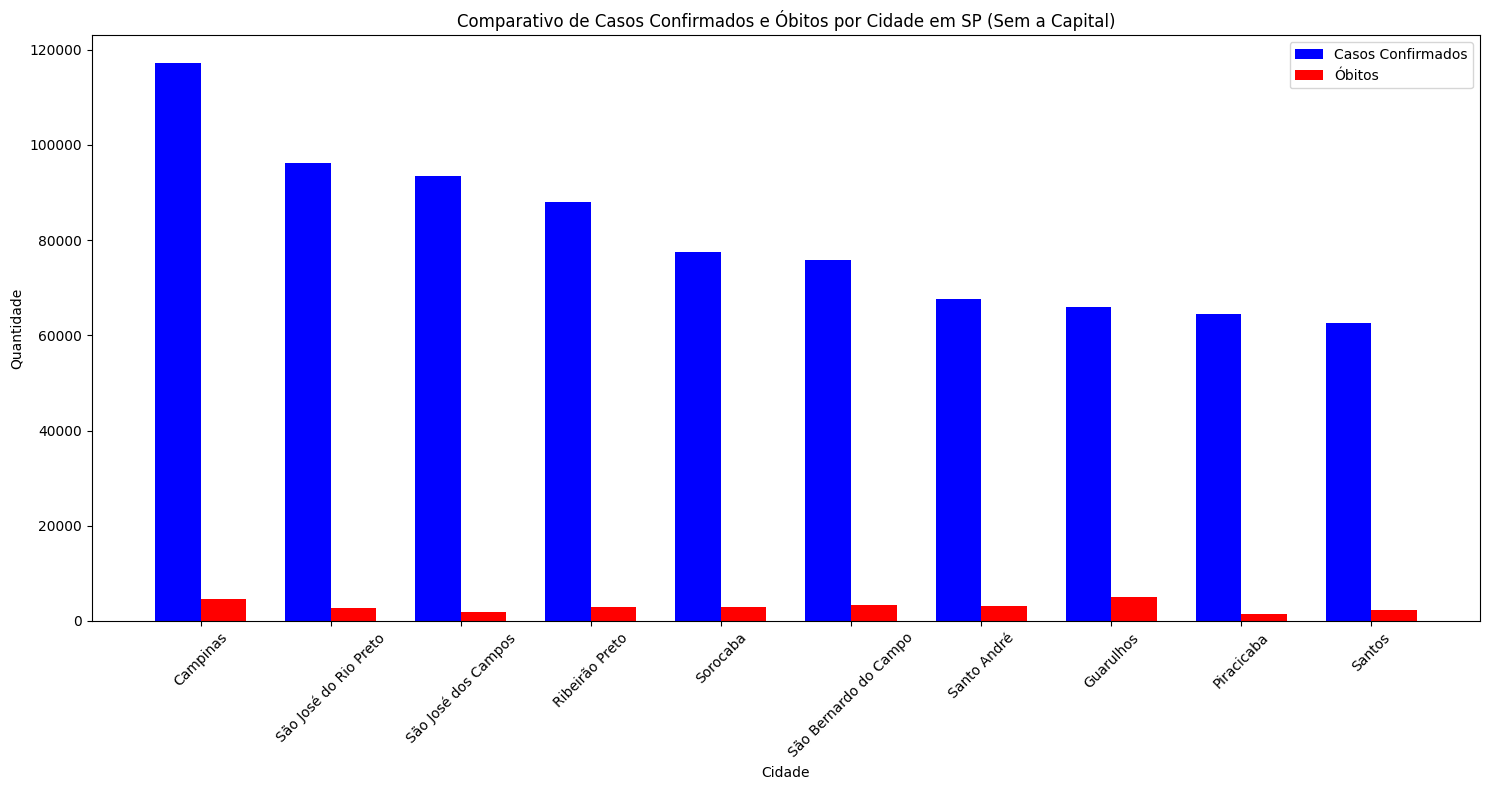

In [52]:
# OPÇÃO 1
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que df_filtered está pronto e contém a cidade de São Paulo
# df_filtered = pd.read_csv('seu_arquivo.csv')

# Filtrar os dados excluindo a cidade de São Paulo
df_filtered_no_sp = df_filtered[df_filtered['city'] != 'São Paulo']

# Agrupar dados por cidade e somar os casos confirmados e óbitos
city_data_no_sp = df_filtered_no_sp.groupby('city').agg({'last_available_confirmed': 'max', 'last_available_deaths': 'max'})

# Ordenar os dados pelo número de casos confirmados para as top 10 cidades
city_data_sorted_no_sp = city_data_no_sp.sort_values('last_available_confirmed', ascending=False).head(10)

# Cria um gráfico de barras duplas para casos confirmados e óbitos
fig, ax = plt.subplots(figsize=(15, 8))

# Configurar a posição das barras no eixo X
index = range(len(city_data_sorted_no_sp))

# Barras para casos confirmados
bar1 = plt.bar(index, city_data_sorted_no_sp['last_available_confirmed'], bar_width, label='Casos Confirmados', color='blue')

# Barras para óbitos
bar2 = plt.bar(index, city_data_sorted_no_sp['last_available_deaths'], bar_width, label='Óbitos', color='red')

# Adicionar nomes e título ao gráfico
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.title('Comparativo de Casos Confirmados e Óbitos por Cidade em SP (Sem a Capital)')
plt.xticks(index, city_data_sorted_no_sp.index, rotation=45)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# OPÇÃO 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que df_filtered_no_sp já esteja definido e não inclua a cidade de São Paulo
# df_filtered_no_sp = pd.read_csv('dados_SP_sem.csv')

# Agrupar dados por cidade e somar os casos confirmados e óbitos
city_data_no_sp = df_filtered_no_sp.groupby('city').agg({'last_available_confirmed': 'max', 'last_available_deaths': 'max'})

# Ordenar os dados pelo número de casos confirmados para as top 10 cidades
city_data_sorted_no_sp = city_data_no_sp.sort_values('last_available_confirmed', ascending=False).head(10)

# Cria um gráfico de barras adjacentes para casos confirmados e óbitos
fig, ax = plt.subplots(figsize=(15, 8))

# Configurar a posição das barras no eixo X
indices = np.arange(len(city_data_sorted_no_sp))
bar_width = 0.35

# Barras para casos confirmados
bars1 = plt.bar(indices - bar_width/2, city_data_sorted_no_sp['last_available_confirmed'], bar_width, label='Casos Confirmados', color='blue')

# Barras para óbitos
bars2 = plt.bar(indices + bar_width/2, city_data_sorted_no_sp['last_available_deaths'], bar_width, label='Óbitos', color='red')

# Adicionar nomes e título ao gráfico
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.title('Comparativo de Casos Confirmados e Óbitos por Cidade em SP (Sem a Capital)')
plt.xticks(indices, city_data_sorted_no_sp.index, rotation=45)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


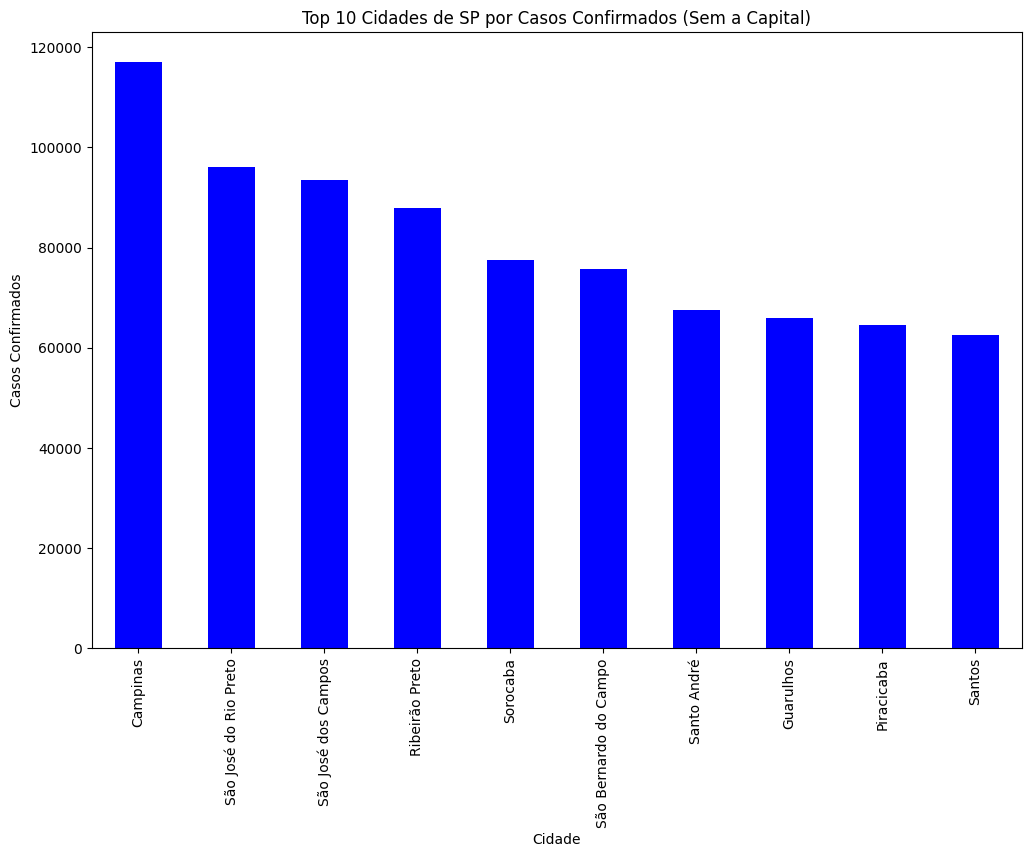

<Figure size 1200x800 with 0 Axes>

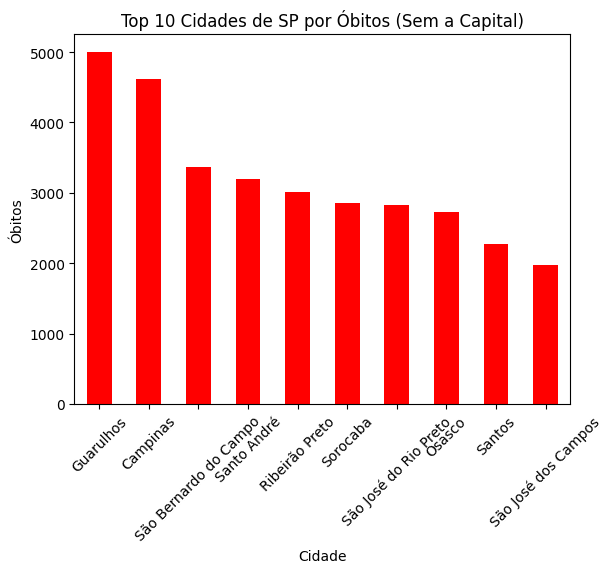

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados (assumindo que df_filtered_no_sp já tenha sido criado e não inclua a cidade de São Paulo)
# df_filtered_no_sp = pd.read_csv('seu_arquivo.csv')

# Agrupar dados por cidade e somar os casos confirmados e óbitos
city_data_no_sp = df_filtered_no_sp.groupby('city').agg({
    'last_available_confirmed': 'max', 
    'last_available_deaths': 'max'
})

# Ordenar os dados pelo número de casos confirmados
city_data_sorted_no_sp = city_data_no_sp.sort_values('last_available_confirmed', ascending=False)

# Plotar os top 10 cidades por casos confirmados, excluindo a cidade de São Paulo
plt.figure(figsize=(12, 8))
city_data_sorted_no_sp.head(10)['last_available_confirmed'].plot(kind='bar', color='blue')
plt.title('Top 10 Cidades de SP por Casos Confirmados (Sem a Capital)')
plt.xlabel('Cidade')
plt.ylabel('Casos Confirmados')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_filtered_no_sp já esteja definido e não inclua a cidade de São Paulo
# df_filtered_no_sp = pd.read_csv('dados_SP_sem.csv')

# Agrupar dados por cidade e somar os casos confirmados e óbitos
city_data_no_sp = df_filtered_no_sp.groupby('city').agg({'last_available_confirmed': 'max', 'last_available_deaths': 'max'})

# Ordenar os dados pelo número de óbitos para as top 10 cidades e resetar o índice
city_data_sorted_no_sp = city_data_no_sp.sort_values('last_available_deaths', ascending=False).head(10).reset_index()

# Plotar as barras em ordem decrescente de óbitos
plt.figure(figsize=(12, 8))
city_data_sorted_no_sp.plot(x='city', y='last_available_deaths', kind='bar', color='red', legend=False)
plt.title('Top 10 Cidades de SP por Óbitos (Sem a Capital)')
plt.xlabel('Cidade')
plt.ylabel('Óbitos')
plt.xticks(rotation=45)
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_17520\3097227893.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_sp['date'] = pd.to_datetime(df_filtered_no_sp['date'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_17520\3097227893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_sp['death_rate'] = df_filtered_no_sp['new_deaths'] / df_filtered_no_sp['new_confirmed'].replace({0: 0.1})
C:\Users\gabri\AppData\Local\Temp\ipykernel_17520\3097227893.py:12: SettingWithCopyWarning: 
A

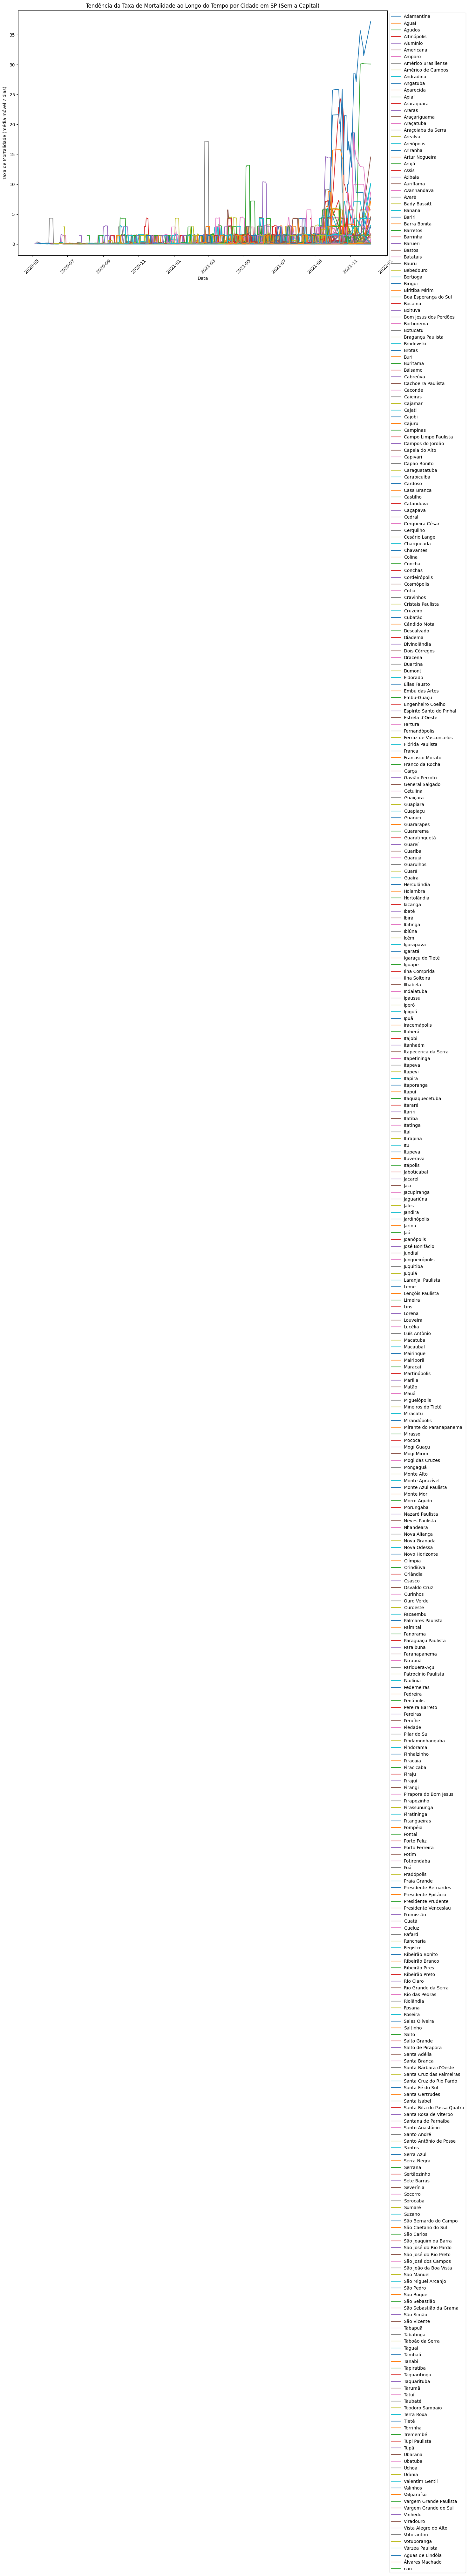

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_filtered_no_sp já esteja definido e não inclua a cidade de São Paulo
# df_filtered_no_sp = pd.read_csv('dados_SP_sem.csv')

# Garantir que 'date' esteja no formato de data
df_filtered_no_sp['date'] = pd.to_datetime(df_filtered_no_sp['date'])

# Calcular a taxa de mortalidade diária por cidade e a média móvel
df_filtered_no_sp['death_rate'] = df_filtered_no_sp['new_deaths'] / df_filtered_no_sp['new_confirmed'].replace({0: 0.1})
df_filtered_no_sp['death_rate_ma7'] = df_filtered_no_sp.groupby('city')['death_rate'].transform(lambda x: x.rolling(window=7).mean())

# Para uma análise mais positiva, selecionamos cidades com mais de um número mínimo de casos para uma análise mais robusta
min_confirmed = 1000
cities_filtered = df_filtered_no_sp[df_filtered_no_sp['last_available_confirmed'] > min_confirmed]

# Agora vamos pegar as datas e cidades únicas para plotar
dates = cities_filtered['date'].unique()
cities = cities_filtered['city'].unique()

plt.figure(figsize=(15, 10))

# Para cada cidade, plotar a taxa de mortalidade ao longo do tempo
for city in cities:
    city_data = cities_filtered[cities_filtered['city'] == city]
    plt.plot(city_data['date'], city_data['death_rate_ma7'], label=city)

plt.title('Tendência da Taxa de Mortalidade ao Longo do Tempo por Cidade em SP (Sem a Capital)')
plt.xlabel('Data')
plt.ylabel('Taxa de Mortalidade (média móvel 7 dias)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ajusta a legenda para ficar fora do gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
